<a href="https://colab.research.google.com/github/MonicaKim89/Arthritis_Classification/blob/main/%5B0303%5Dfor_yolo_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Projects/knee/yolov5

/content/drive/MyDrive/Projects/knee/yolov5


In [5]:
!pip install -qr requirements.txt

     |████████████████████████████████| 596 kB 6.9 MB/s 


In [11]:
!python yolov5_detect_crop.py --weights /content/drive/MyDrive/Projects/knee/knee_best.pt --img 224 --conf 0.8 --source /content/drive/MyDrive/Projects/knee/for_yolov5_test/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.8, device='', exist_ok=False, img_size=224, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/Projects/knee/for_yolov5_test/', update=False, view_img=False, weights=['/content/drive/MyDrive/Projects/knee/knee_best.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/15 /content/drive/MyDrive/Projects/knee/for_yolov5_test/0_9051960R.jpg: /content/drive/MyDrive/Projects/knee/for_yolov5_test/result/13_0_9051960R

In [12]:
cord=[]
f = open('/content/drive/MyDrive/Projects/knee/for_yolov5_test/result/test.txt', 'r')
lines = f.readlines()
for line in lines:
    k = line.split('\n')[0]
    k = k.replace('(','')
    k = k.replace(')','')
    k = k.replace(',','')
    cord.append(k)
cord

['2 1 222 163',
 '3 5 219 167',
 '1 36 222 165',
 '0 2 224 38',
 '4 8 220 166',
 '2 33 221 164',
 '0 0 224 37',
 '10 188 207 35',
 '1 19 223 167',
 '5 5 212 201',
 '5 53 217 167',
 '5 51 219 170',
 '2 28 222 162',
 '2 19 221 163',
 '5 1 211 203',
 '4 6 220 168',
 '4 8 216 166',
 '1 76 217 146',
 '3 4 220 169']

In [13]:
x = int(cord[0].split(' ')[0])
y = int(cord[0].split(' ')[1])
w = int(cord[0].split(' ')[2])
h = int(cord[0].split(' ')[3])

In [21]:
import math
import cv2
import matplotlib.pylab as plt

In [27]:
def show(img):
    #사이즈
    plt.figure(figsize = (10,8))
    #xticks/yticks - 눈금표
    plt.xticks([])
    plt.yticks([])
    #코랩에서 안돌아감 주의
    plt.imshow(img, cmap= 'gray')
    plt.show()

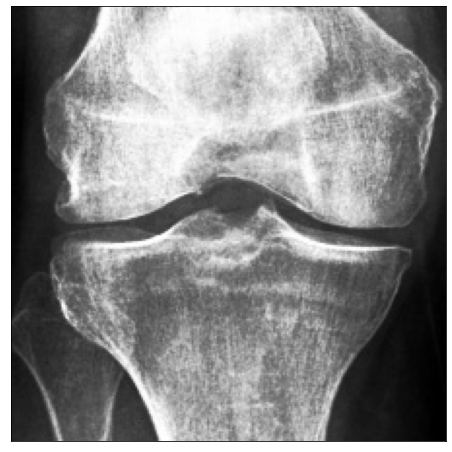

In [28]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Projects/knee/for_yolov5_test/0_9051960R.jpg')

show(img)

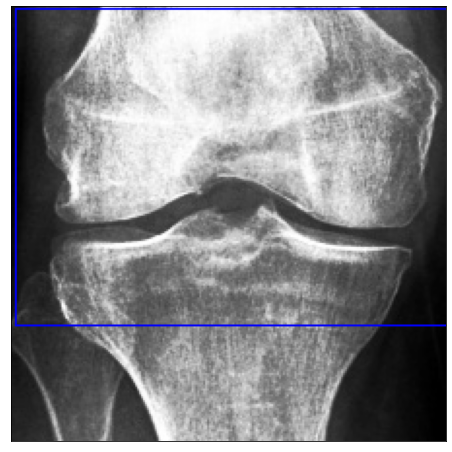

In [29]:
img_ = img.copy()
img_ = cv2.rectangle(img_, (x,y),(x+w,y+h), (0,0,255), 1)

show(img_)

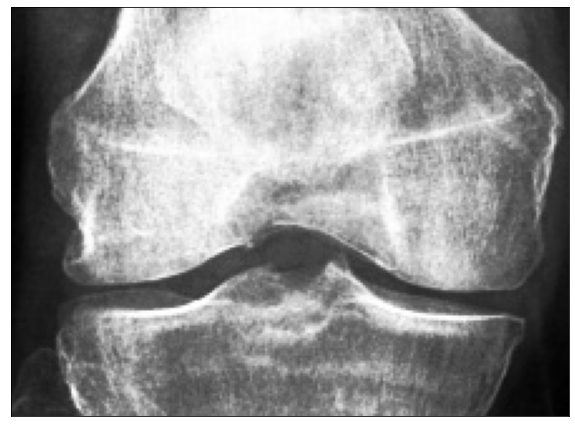

In [30]:
img_ = img.copy()
# img_ = cv2.rectangle(img_, (x,y),(x+w,y+h), (0,0,255), 1)
crop_img=img_[y:y+ h, x:x + w]  
show(crop_img)